install the necessary libraries

In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

Loading the training and test datasets from CSV files named 'train.csv' and 'test.csv', respectively, into pandas DataFrame objects.

In [2]:
# Load the dataset
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

`train_df.info()` provides a quick overview of the dataset's structure and completeness.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

`test_df.info()` summarizes the structure and completeness of the test dataset.

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

`train_df.describe()` summarizes numerical statistics of the training dataset.

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


`test_df.describe()` provides statistical summaries of the numerical columns in the test dataset.

In [6]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


setting up the pipeline for training an XGBoost model. It preprocesses the data using the same preprocessing steps as before. Then it initializes an XGBoost model pipeline and trains it on the training data. Finally, it computes and prints the Root Mean Squared Error (RMSE) as the evaluation metric for the XGBoost model on the validation set.

In [7]:
# Define your target variable and drop it from the input features along with 'Id'
X = train_df.drop(['SalePrice', 'Id'], axis=1)
y = np.log(train_df['SalePrice'])  # Log transformation of the target variable

# Define numeric and categorical features
numeric_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
                        'SaleType', 'SaleCondition']

# Transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model Pipeline
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))])


# Train XGBoost Model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))

# Print RMSE
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 0.14804085412881332


Defining a parameter grid `param_grid_xgb` for tuning the hyperparameters of the XGBoost model. It sets up a `GridSearchCV` object `grid_search_xgb` to search for the best combination of hyperparameters using cross-validation. The grid search is performed on the training data, and the best model obtained is evaluated on the validation set. Finally, the Root Mean Squared Error (RMSE) of the best XGBoost model is printed.

In [8]:
param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 6, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0],
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5,
                               scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search_xgb.fit(X_train, y_train)

# Extract the best estimator
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on the validation set
y_pred_best_xgb = best_xgb_model.predict(X_val)

# Calculate RMSE for the best XGBoost model
rmse_best_xgb = np.sqrt(mean_squared_error(y_val, y_pred_best_xgb))

# Print the best RMSE
print(f"Best XGBoost RMSE: {rmse_best_xgb}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost RMSE: 0.1296830041755427


Generating  predictions on the test dataset using the best trained models for RandomForest and XGBoost, obtained after hyperparameter tuning. It preprocesses the test dataset using the same pipeline as the training data. Predictions are made using the best XGBoost model, and the resulting SalePrice predictions are transformed back from logarithmic scale to their original form. Finally, a submission file is created for XGBoost predictions. The file path for the submission is printed for reference.

In [11]:
# Best models for RandomForest and XGBoost models trained with the best parameters

# Preprocess the test dataset (this is handled automatically by the pipeline)
X_test = test_df.drop(['Id'], axis=1)  # Ensure to drop the 'Id' column or any other non-feature column


# Predictions with XGBoost
y_test_pred_xgb = best_xgb_model.predict(X_test)
y_test_pred_actual_xgb = np.exp(y_test_pred_xgb)  # Inverse of log transformation

# Prepare submission files

# XGBoost Submission
submission_xgb = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_test_pred_actual_xgb
})
submission_file_path_xgb = 'submission_xgb.csv'
submission_xgb.to_csv(submission_file_path_xgb, index=False)

# Output paths for submission files
print("Submission file paths:")
print("XGBoost:", submission_file_path_xgb)


Submission file paths:
XGBoost: submission_xgb.csv


Segmenting  plots the actual versus predicted values for the XGBoost model. It compares the actual logarithm of SalePrice (y_val) against the predicted logarithm of SalePrice (y_pred_best_xgb) on the validation set. The scatter plot visualizes the relationship between the two, with a diagonal dashed line indicating perfect predictions. This visualization helps assess the performance and accuracy of the model.

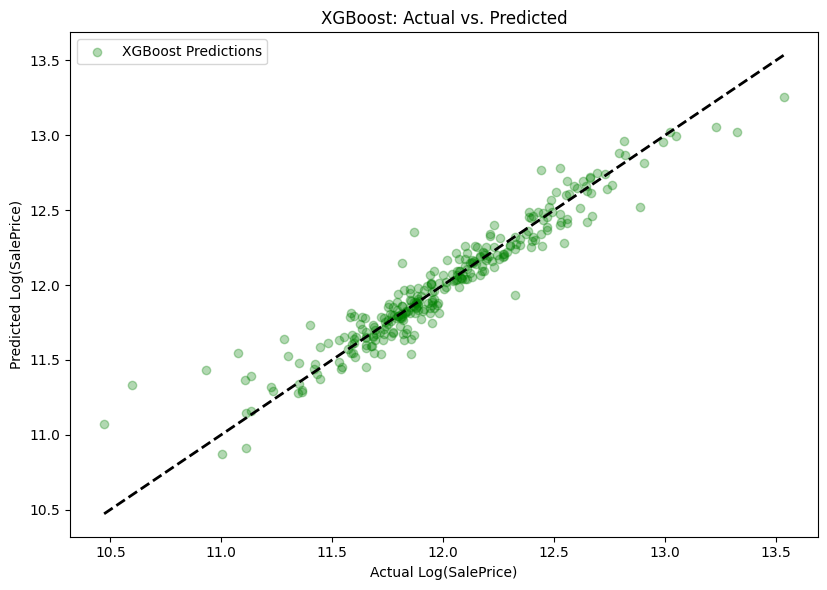

In [10]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(16, 6))


# XGBoost Plot
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_best_xgb, alpha=0.3, color='green', label='XGBoost Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.title('XGBoost: Actual vs. Predicted')
plt.xlabel('Actual Log(SalePrice)')
plt.ylabel('Predicted Log(SalePrice)')
plt.legend()

plt.tight_layout()
plt.show()
